In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Python_Core_DA_ML_DS/POC/POC_3/Chemical Industry/Historical Alarm Cases.xlsx')
df.head()

,Case No.,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1),Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Case # 1,-2,226,1,96,9,21,1,NaN,NaN,NaN
1,Case # 2,4,134,1,83,4,77,0,NaN,NaN,NaN
2,Case # 3,7,163,0,69,2,81,0,NaN,NaN,NaN
3,Case # 4,5,162,0,80,6,69,0,NaN,NaN,NaN
4,Case # 5,2,192,1,87,3,67,0,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1892 entries, 0 to 1891
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Case No.                            1892 non-null   object 
 1   Ambient Temperature( deg C)         1892 non-null   int64  
 2   Calibration(days)                   1892 non-null   int64  
 3   Unwanted substance deposition(0/1)  1892 non-null   int64  
 4   Humidity(%)                         1892 non-null   int64  
 5   H2S Content(ppm)                    1892 non-null   int64  
 6   detected by(% of sensors)           1892 non-null   int64  
 7   Spuriosity Index(0/1)               1892 non-null   int64  
 8   Unnamed: 8                          0 non-null      float64
 9   Unnamed: 9                          0 non-null      float64
 10  Unnamed: 10                         1 non-null      float64
dtypes: float64(3), int64(7), object(1)
memory u

# Handle Null values and Duplicate values

In [ ]:
# check null values
null_percentage = (df.isnull().mean()) * 100

In [ ]:
# here we drop columns which have null values > 20 %
null_columns = list(df.columns[((df.isnull().mean())*100) > 20].values)
null_columns.append('Case No.') # unwanted columns
null_columns

['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Case No.']

In [ ]:
# drop those columns contains the null values > 20% and unwanted columns Case No.
df = df.drop(columns=null_columns)
df.head()

,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1)
0,-2,226,1,96,9,21,1
1,4,134,1,83,4,77,0
2,7,163,0,69,2,81,0
3,5,162,0,80,6,69,0
4,2,192,1,87,3,67,0


In [ ]:
# check the correlation between columns..
abs(df.corr()['Spuriosity Index(0/1)'] * 100)

Ambient Temperature( deg C)             4.869033
Calibration(days)                       1.157896
Unwanted substance deposition(0/1)      0.164028
Humidity(%)                             1.131813
H2S Content(ppm)                        0.423267
detected by(% of sensors)              84.913608
Spuriosity Index(0/1)                 100.000000
Name: Spuriosity Index(0/1), dtype: float64

# Outlier Detection and Handling

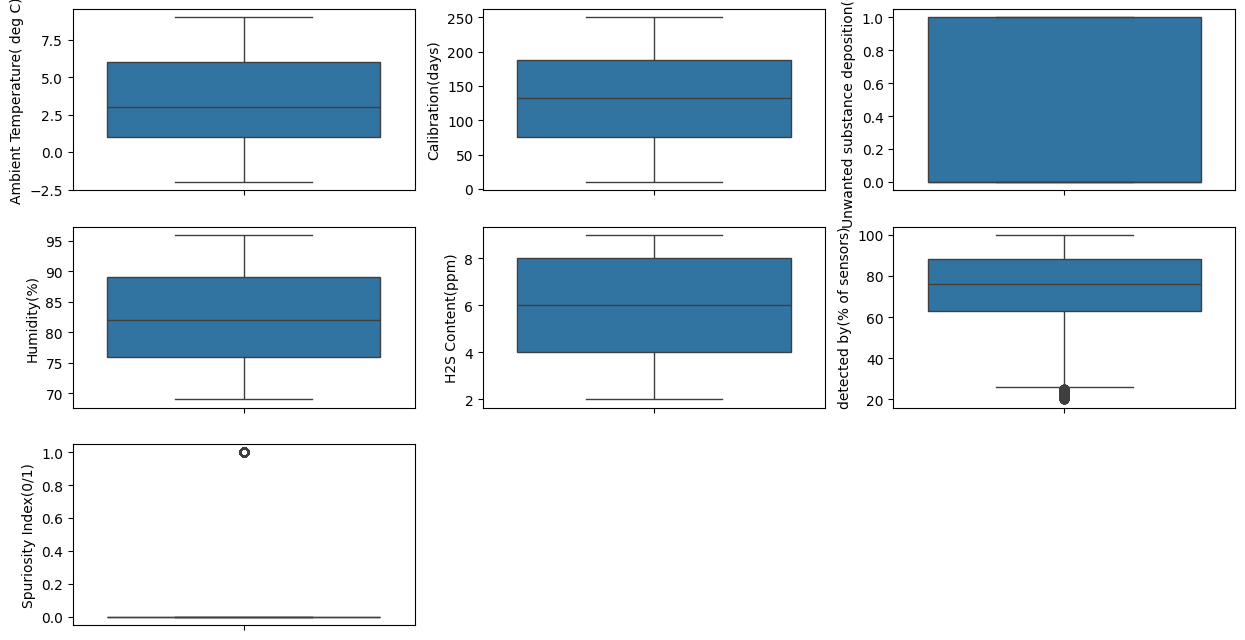

In [ ]:
# check thge distributionof the data
plt.figure(figsize=(15,8))
for i in range(len(df.columns)):

  plt.subplot(3,3,i+1)
  sns.boxplot(data=df,y=df.columns[i])
  plt.ylabel(df.columns[i])
plt.show()

In [ ]:
# detect the outliers in --> detected by(% of sensors)	Spuriosity
df.describe()

,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1)
count,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000,1892.000000
mean,3.449789,131.633192,0.482030,82.513214,5.532241,71.610465,0.173890
std,3.323731,67.741005,0.499809,7.659900,2.271502,21.203802,0.379115
min,-2.000000,10.000000,0.000000,69.000000,2.000000,20.000000,0.000000
25%,1.000000,75.000000,0.000000,76.000000,4.000000,63.000000,0.000000
50%,3.000000,133.000000,0.000000,82.000000,6.000000,76.000000,0.000000
75%,6.000000,188.000000,1.000000,89.000000,8.000000,88.000000,0.000000
max,9.000000,250.000000,1.000000,96.000000,9.000000,100.000000,1.000000


In [ ]:
# there no normal distribution then we use IQR maethod
# if it is Normal Distribution then we used Z-score method
per25 = df['detected by(% of sensors)'].quantile(0.25)
per75 = df['detected by(% of sensors)'].quantile(0.75)

In [ ]:
print(per25)
print(per75)

63.0
88.0


In [ ]:
# calculate the IQR
iqr = per75 - per25
iqr

25.0

In [ ]:
# calculate the lower limit and the upper limit....
lowerlimit = per25 - 1.5 * iqr
upperlimit = per75 + 1.5 * iqr
print(lowerlimit)
print(upperlimit)

25.5
125.5


In [ ]:
temp_df = df.copy()
temp_df.shape

(1892, 7)

## Outlier Capping

In [ ]:
df['detected by(% of sensors)'] = np.where(df['detected by(% of sensors)'] < lowerlimit, lowerlimit,
                                                np.where(df['detected by(% of sensors)'] > upperlimit,upperlimit,df['detected by(% of sensors)']))

<Axes: >

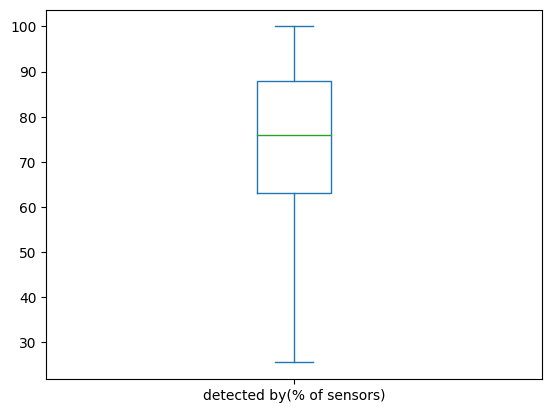

In [ ]:
df['detected by(% of sensors)'].plot(kind='box')
# now all outliers are removed....

In [ ]:
final_df = df.copy()
final_df.shape

(1892, 7)

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = final_df.drop(columns=['Spuriosity Index(0/1)'])
y = final_df['Spuriosity Index(0/1)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

In [ ]:
X

,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors)
0,-2,226,1,96,9,25.5
1,4,134,1,83,4,77.0
2,7,163,0,69,2,81.0
3,5,162,0,80,6,69.0
4,2,192,1,87,3,67.0
...,...,...,...,...,...,...
1887,6,195,1,72,5,79.0
1888,8,134,1,94,9,25.5
1889,1,32,0,95,4,100.0
1890,6,31,0,93,6,39.0


In [ ]:
trf1 = ColumnTransformer([('scaler',StandardScaler(),slice(0,6))],remainder='passthrough')
trf2 = LogisticRegression()

In [ ]:
pipe = Pipeline([('scale',trf1),('Classifier',trf2)])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 6, None))])),
                ('Classifier', LogisticRegression())])

In [ ]:
pipe.score(X_test,y_test)

0.9973614775725593

In [ ]:
y_pred = pipe.predict(X_test)
accuracy_score(y_pred,y_test)

0.9973614775725593

In [ ]:
#sc = StandardScaler()
#X_train_trf = sc.fit_transform(X_train)
#X_test_trf = sc.transform(X_test)

In [ ]:
parameters = {
    'Classifier__C':[0.001, 0.01, 0.1, 1, 10, 100],
    'Classifier__penalty':['l1','l2','elasticnet'],
    'Classifier__solver': ['liblinear','newton-cholesky']
}

gsc = GridSearchCV(pipe,param_grid=parameters,cv=5,scoring='accuracy')

gsc.fit(X_train,y_train)
y_pred = gsc.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.9973614775725593


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


In [ ]:
# we need to solve it using Logistic Regression
#lr = LogisticRegression()
#lr.fit(X_train_trf,y_train)
#lr.score(X_test_trf,y_test)

In [ ]:
#y_pred = lr.predict(X_test_trf)
#accuracy_score(y_pred,y_test)

In [ ]:
# we find model with Over fitting
print('-'*40)
print(cross_val_score(gsc,X_train,y_train,cv=10).mean())
print('-'*40)
# 0.9978891673628516 ---> Not an issue with overfitting

----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


0.9993421052631579
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)


In [ ]:
print(gsc.best_params_)
print(gsc.best_score_)

{'Classifier__C': 0.1, 'Classifier__penalty': 'l2', 'Classifier__solver': 'newton-cholesky'}
1.0


In [ ]:
compare = pd.DataFrame({'Actual data':y_test,'Predicted data':y_pred})
compare.sample(10)

,Actual data,Predicted data
766,0,0
1804,0,0
107,0,0
1303,1,1
58,0,0
99,0,0
421,0,0
1561,0,0
267,0,0
1300,0,0


In [ ]:
compare [compare['Actual data'] != compare['Predicted data']]

,Actual data,Predicted data
18,0,1


In [ ]:
import pickle
pickle.dump(gsc,open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))

In [ ]:
test = np.array([9,	91,	0	,78,	3,	25.5]).reshape(1,6)#--1
test
# 9	91	0	78	3	25.5

array([[ 9. , 91. ,  0. , 78. ,  3. , 25.5]])

In [ ]:
model.predict(test)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1

In [ ]:
df.sample(1)

,Ambient Temperature( deg C),Calibration(days),Unwanted substance deposition(0/1),Humidity(%),H2S Content(ppm),detected by(% of sensors),Spuriosity Index(0/1)
429,0,11,1,88,5,68.0,0
